##Day 41 - DIY Solution

**Q1. Problem Statement: K Nearest Neighbour (KNN) Algorithm**

You are given a dataset – “diabetes.csv.” Load the dataset into a DataFrame. Now, Considering the “Outcome” column as the target variable, perform the  following tasks:
1.	Declare feature vectors and the target variable
2.	 Split the data into test and train fragments using train_test_split() function in 80:20 ratio (80% train, 20% test)
3.	Generate a line plot to show accuracies for different numbers of neighbors
4.	Identify the maximum accuracy from the plot and Calculate model accuracy with the nearest neighbors, which could fetch maximum accuracy
5.	For the neighbors which show maximum accuracy, plot a ROC (Reciever Operating Characteristic) curve



**Step-1:** Loading the data into a DataFrame and performing initial analysis.

In [ ]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

#Load the dataset
df = pd.read_csv('/content/diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Step-2:** declaring "outcome" column as target column and rest of the columns as feature vectors. 

In [ ]:
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [ ]:
print("Target/Output variables:")
display(X)

Target/Output variables:


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
print("Feature Vectotrs:")
display(y)

Feature Vectotrs:


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

**Step-3:** Spliting the data into train and testparts in 80:20 ratio respectively.

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
import sys
print("After splitting the data-")
print("size of input train data is:", sys.getsizeof(X_train))
print("sizeof input test data is:", sys.getsizeof(X_test))
print("size of output train data is:", sys.getsizeof(y_train))
print("size of output test data is:", sys.getsizeof(y_test))

After splitting the data-
size of input train data is: 39416
sizeof input test data is: 9976
size of output train data is: 5016
size of output test data is: 1336


**Step-4:** Build a KNN (K Nearest Neighbor) classifier model using test and train data.

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)


**Step-5:** Plotting accuracies for different K-values.

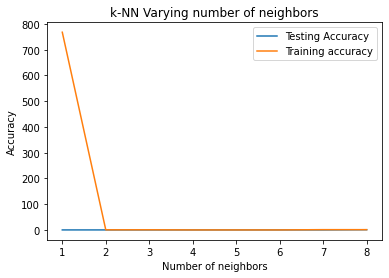

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**Step-5:** Calculating model accuracy with 2 nearest neighbours.

In [ ]:
test_accuracy[i] = knn.score(X_test, y_test) 
test_accuracy[i]

0.7077922077922078

In [ ]:
knn2=KNeighborsClassifier(n_neighbors=2)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
pred2=knn2.predict(X_test)
acc_gnb=accuracy_score(y_test,pred2)
print("Accuracy score for 2 neighbours-")
print('Accuracy Score: ',acc_gnb)

Accuracy score for 2 neighbours-
Accuracy Score:  0.7142857142857143


In [ ]:
#Compute accuracy on the test set
pred3=knn3.predict(X_test)
acc_gnb=accuracy_score(y_test,pred3)
print("Accuracy score for 3 neighbours-")
print('Accuracy Score: ',acc_gnb)

Accuracy score for 3 neighbours-
Accuracy Score:  0.6948051948051948


**Step-6:** Calculating model accuracy with 2 nearest neighbours.

**Step-7:** Plot the ROC curve 
ROC (Reciever Operating Charecteristic) curve

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity)

2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test

3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test

4. The area under the curve is a measure of test accuracy

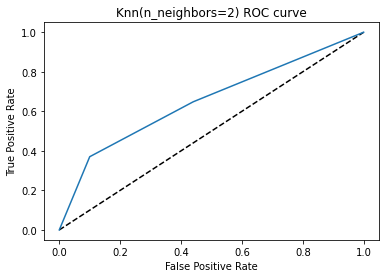

In [ ]:
y_pred_proba = knn2.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()

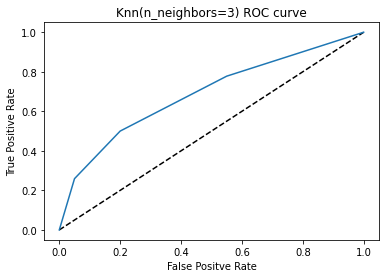

In [ ]:
y_pred_proba = knn3.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()